In [1]:
# Installing the required packages
install.packages("ggplot2")
library(ggplot2)

if (!require("igraph")) install.packages("igraph")
library ("igraph")

also installing the dependencies ‘colorspace’, ‘farver’, ‘labeling’, ‘munsell’, ‘RColorBrewer’, ‘viridisLite’, ‘gtable’, ‘isoband’, ‘scales’





The downloaded binary packages are in
	/var/folders/m6/4mgxnhd5575fll1p8n3_wcjc0000gn/T//RtmpLMGYcL/downloaded_packages


Loading required package: igraph


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




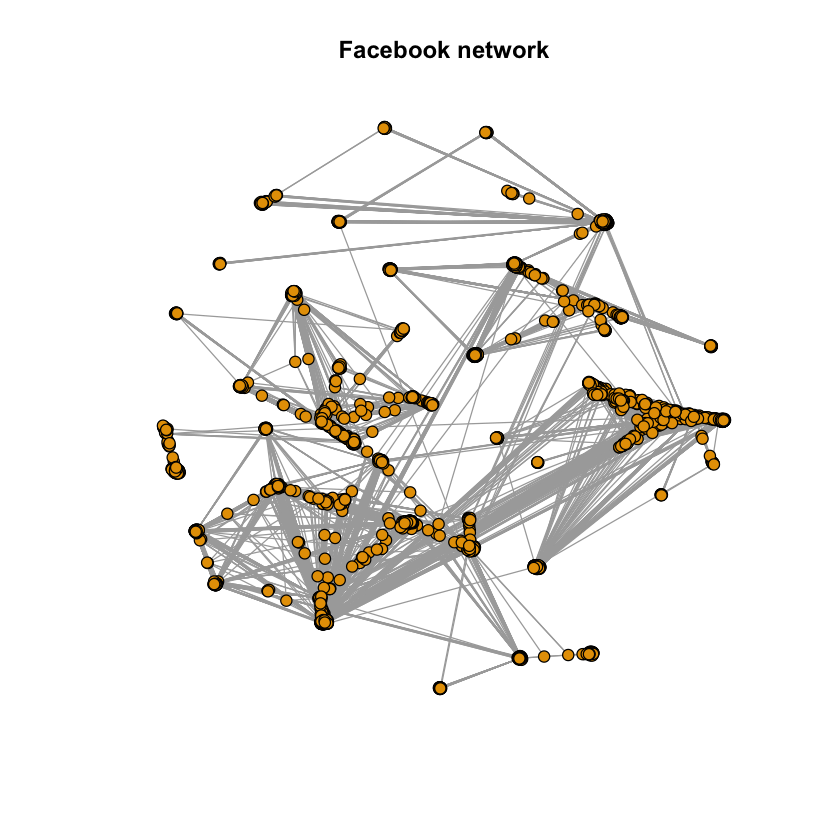

In [2]:
fb_combined = read.table("facebook_combined.txt")
tmp_mat = as.matrix(fb_combined)+1
g = graph.edgelist(tmp_mat,directed=FALSE) 
plot(g, edge.arrow.size=.1, vertex.size=4, vertex.label=NA, main="Facebook network")

QUESTION 1.1: Report the number of nodes and number of edges of the Facebook network.

In [3]:
sprintf('Number of nodes: %s',vcount(g))
sprintf('Number of edges: %s',ecount(g))

[1] "Number of nodes: 4039"

[1] "Number of edges: 88234"

QUESTION 1.2: Is the Facebook network connected? If not, find the giant connected component (GCC) of the network and report the size of the GCC.

In [5]:
print(paste("Network connected: ", is_connected(g)))

[1] "Network connected:  TRUE"


QUESTION 2: Find the diameter of the network. If the network is not connected, then find the diameter of the GCC.

In [6]:
print(paste("Network diameter: ", diameter(g)))

[1] "Network diameter:  8"


QUESTION 3: Plot the degree distribution of the facebook network and report the average degree.

[1] "Average network degree:  522.5"


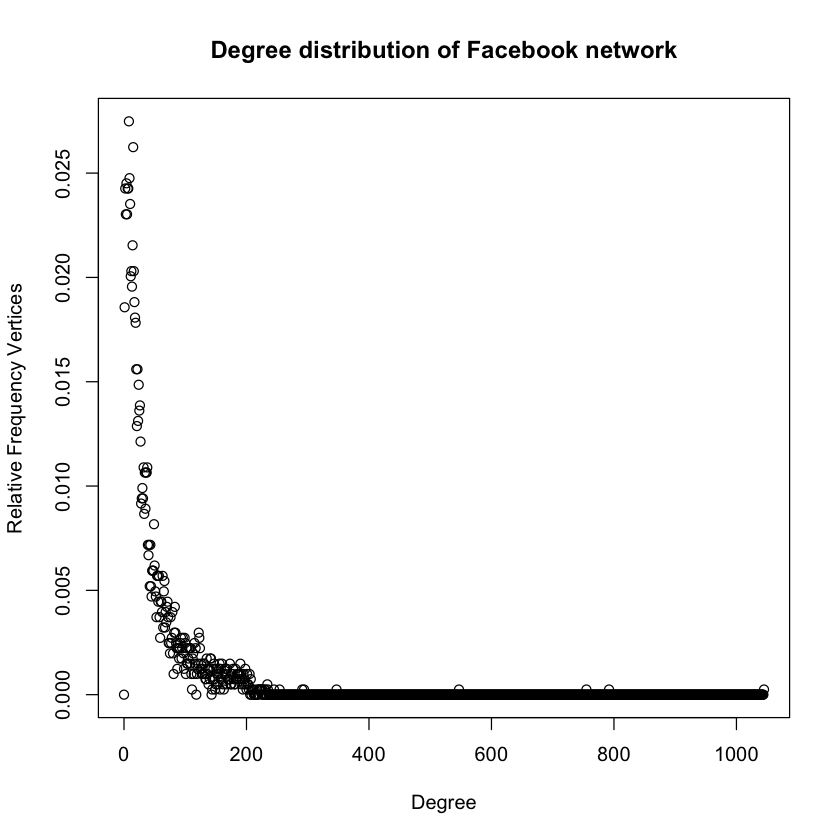

In [7]:
unique_degrees = unique(sort(degree(g)))
if (unique_degrees[1]!=0) {
    unique_degrees = seq(0,max(unique_degrees))
}
dd = degree_distribution(g)

plot(unique_degrees, dd, main="Degree distribution of Facebook network", xlab="Degree", ylab="Relative Frequency Vertices")
print(paste("Average network degree: ", mean(unique_degrees)))

QUESTION 4: Plot the degree distribution of Question 3 in a log-log scale. Try to fit a line to the plot and estimate the slope of the line.


Call:
lm(formula = log_distr_y ~ log_degree_x)

Coefficients:
 (Intercept)  log_degree_x  
     -0.6611       -1.2475  


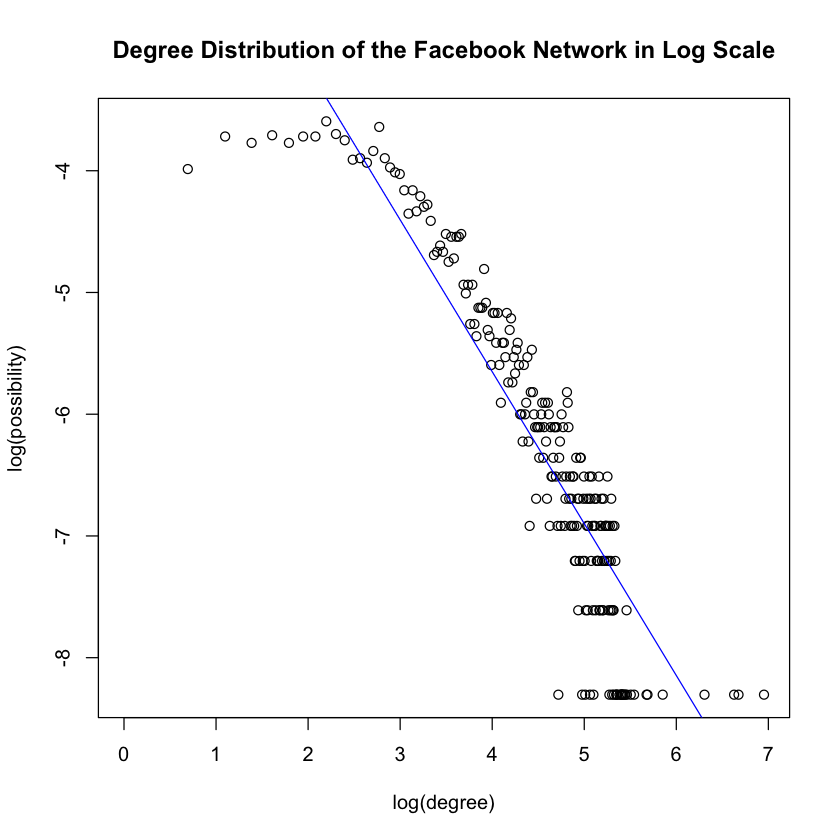

In [9]:
log_degree = log(c(1:length(degree.distribution(g))))
log_distr = log(degree.distribution(g))

log_degree_x = log_degree[-which(is.infinite(log_distr))]
log_distr_y = log_distr[-which(is.infinite(log_distr))]

lr = lm(log_distr_y~log_degree_x)
plot(log_degree, log_distr, main="Degree Distribution of the Facebook Network in Log Scale",xlab="log(degree)",ylab="log(possibility)")
abline(lr, col="blue")
lr

The slope is around -1.25.

QUESTION 5: Create a personalized network of the user whose ID is 1. How many nodes and edges does this personalized network have?

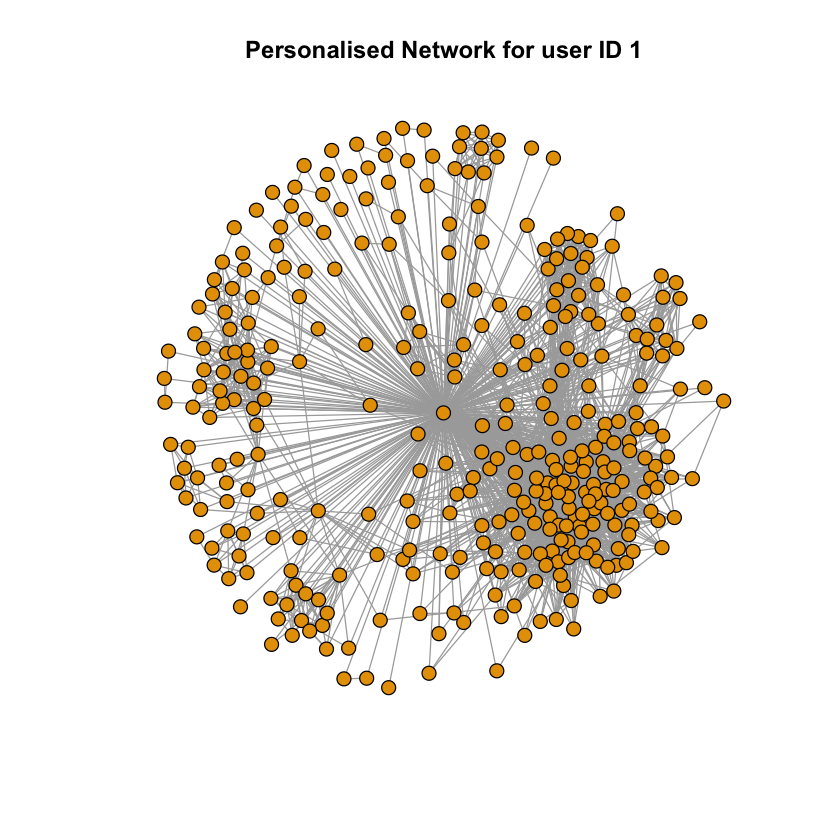

In [10]:
g1 = make_ego_graph(g, order=1,nodes=c('1'))[[1]]
test = plot(g1, edge.arrow.size=.1, vertex.size=5, vertex.label=NA,main="Personalised Network for user ID 1")

In [11]:
sprintf('Number of nodes: %s',vcount(g1))
sprintf('Number of edges: %s',ecount(g1))

[1] "Number of nodes: 348"

[1] "Number of edges: 2866"

QUESTION 6: What is the diameter of the personalized network? Please state a trivial upper
and lower bound for the diameter of the personalized network.

In [12]:
print(paste("Network diameter: ", diameter(g1)))

[1] "Network diameter:  2"


According to this paper (https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.101.5280&rep=rep1&type=pdf), good upper and lower bounds for any vertex v are as follows:  
eccentricity(v) ≤ Diameter ≤ 2 · eccentricity(v)

In [16]:
eccentricity(g1, vids = V(g1))

[1] 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [38] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 [75] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[112] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[149] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[186] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[223] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[260] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[297] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
[334] 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

So for these vertices, the lower bound can be either 1 or 2 and the upper bound can be either 2 or 4 depending on the node. The value of 1 for diameter I think refers to a vertex pointing to itself. The bounds could be written as follows:  
1 ≤ Diameter ≤ 2  
2 ≤ Diameter ≤ 4

QUESTION 7: In the context of the personalized network, what is the meaning of the diameter of the personalized network to be equal to the upper bound you derived in Question 6. What is the meaning of the diameter of the personalized network to be equal to the lower bound you derived in Question 6 (assuming there are more than 3 nodes in the personalized network)?

???

QUESTION 8: How many core nodes are there in the Facebook network. What is the average degree of the core nodes?

In [17]:
facebook_net = g
core_nodes = c()

for (i in degree(facebook_net)){
  if (i > 200) {
    core_nodes = c(core_nodes, i)
  }
}

print(paste('Number of core nodes:', length(core_nodes)))
print(paste('Average Degree:', mean(core_nodes)))

[1] "Number of core nodes: 40"
[1] "Average Degree: 279.375"


QUESTION 9: For each of the above core node’s personalized network, find the community struc- ture using Fast-Greedy, Edge-Betweenness, and Infomap community detection algorithms. Compare the modularity scores of the algorithms. For visualization purpose, display the community structure of the core node’s personalized networks using colors. Nodes belonging to the same community should have the same color and nodes belonging to different communities should have different color. In this question, you should have 15 plots in total.

In [18]:
#helper function for community dection algorithms
community_detect = function(g, node_id) {
  fg <- fastgreedy.community(g)
  eb <- edge.betweenness.community(g)
  info_map <- infomap.community(g)

  cat("Node:", node_id, "\n") #make print output separator
  print(sprintf('Fast-Greedy Modularity Node %s is %s', node_id, modularity(fg)))
  print(sprintf('Edge-Betweenness Modularity Node %s is %s', node_id, modularity(eb)))
  print(sprintf('Info Map Modularity Node %s is %s', node_id, modularity(info_map)))
 
  
  plot(g, mark.groups = groups(fg), edge.arrow.size=0.1, vertex.color=fg$membership, vertex.size=5, vertex.label = NA, main=sprintf("Fast-Greedy; Core Node: %s", node_id))
  

  
  plot(g, mark.groups = groups(eb), edge.arrow.size=0.1, vertex.color=eb$membership, vertex.size=5, vertex.label = NA, main=sprintf("Edge-Betweenness; Core Node: %s", node_id))
  

  
  plot(g, mark.groups = groups(info_map), edge.arrow.size=0.1, vertex.color=info_map$membership, vertex.size=5, vertex.label = NA, main=sprintf("Info Map; Core Node: %s", node_id))
  
  cat('\n')
}

Node: 1 
[1] "Fast-Greedy Modularity Node 1 is 0.413101372834235"
[1] "Edge-Betweenness Modularity Node 1 is 0.353302172546335"
[1] "Info Map Modularity Node 1 is 0.389118471050977"


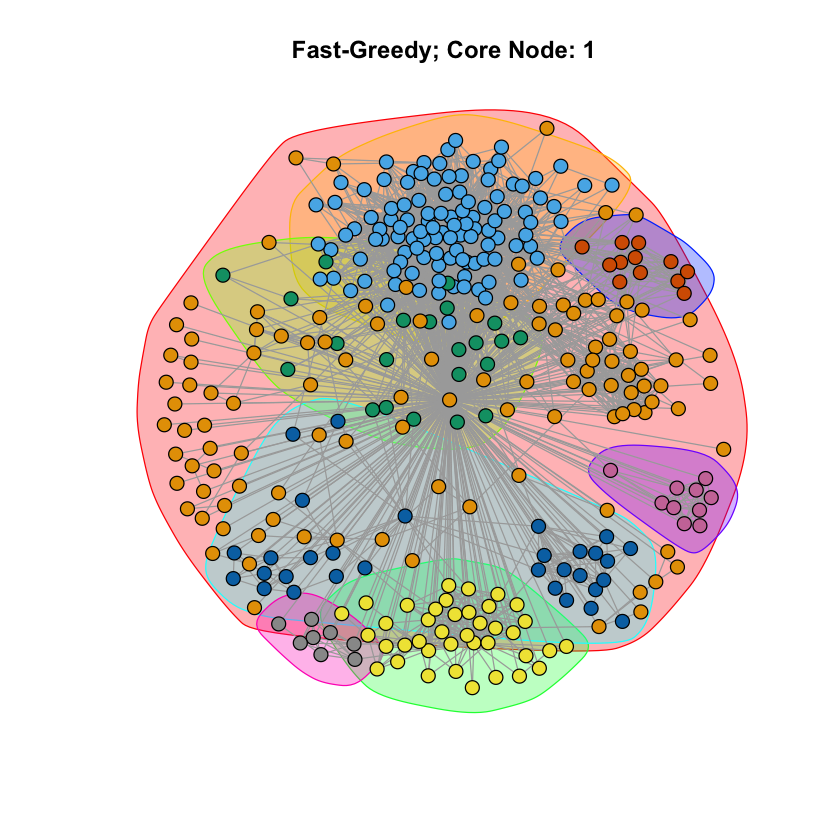

In [ ]:
core_nodes = c(1, 108, 349, 484, 1087)
for(cn in core_nodes){
    community_detect(induced.subgraph(g, c(cn, neighbors(g,cn))), cn)
}

QUESTION 10: For each of the core node’s personalized network (use same core nodes as Question 9), remove the core node from the personalized network and find the community structure of the modified personalized network. Use the same community detection algorithm as Question 9. Compare the modularity score of the community structure of the modified personalized network with the modularity score of the community structure of the personalized network of Question 9. For visualization purpose, display the community structure of the modified personalized network using colors. In this question, you should have 15 plots in total.

In [ ]:
for(cn in core_nodes){
    community_detect(induced.subgraph(g, neighbors(g,cn)), cn)
}